<a href="https://colab.research.google.com/github/swalehaparvin/Working_with_LLMs/blob/main/Working_with_LLMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using a pipeline for summarization
Run a summarization pipeline using the "cnicu/t5-small-booksum" model from the Hugging Face hub.

A long_text about the Eiffel Tower has been provided and the pipeline module from transformers is already imported.

-Load the model pipeline for a summarization task using the model "cnicu/t5-small-booksum".

-Generate the output by passing the long_text to the pipeline; limit the output to 50 tokens.

-Access and print the summarized text only from the output.

In [ ]:
# Load the model pipeline
from transformers import pipeline
!pip install huggingface_hub
summarizer = pipeline(task="summarization", model="cnicu/t5-small-booksum")

# Pass the long text to the model
output = summarizer('long_text', max_length=50)

# Access and print the summarized text
print(output[0]["summary_text"])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/242M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.79k [00:00<?, ?B/s]

Device set to use cpu
Your max_length is set to 50, but your input_length is only 6. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)
Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


long_text: long_script: long-text: short_text. long_title: long:text: longer_text . long: text: long=text.


# Generating text
LLMs have many capabilities with text generation being one of the most popular.

You need to generate a response to a customer review found in text; it contains the same customer review for the Riverview Hotel you've seen before.

Instantiate the generator pipeline specifying an appropriate task for generating text.

Complete the prompt by including the text and response in the f-string.

Complete the model pipeline by specifying a maximum length of 150 tokens and setting the pad_token_id to the end-of-sequence token.

In [ ]:
# Instantiate the pipeline
from transformers import pipeline
!pip install huggingface_hub
generator = pipeline(task="text-generation", model="gpt2")

response = "Dear valued customer, I am glad to hear you had a good stay with us."

# Complete the prompt

text = """The Riverview Hotel was a pleasant surprise! The staff was incredibly friendly and helpful, and the view from my room was breathtaking. The breakfast buffet had a great variety, and everything was fresh. I would definitely recommend staying here."""
prompt = f"Customer review:\n{text}\n\nHotel reponse to the customer:\n{response}"
# Complete the model pipeline
outputs = generator(prompt, max_length=150, pad_token_id=generator.tokenizer.eos_token_id, truncation=True)

print(outputs[0]["generated_text"])

Device set to use cpu
Both `max_new_tokens` (=256) and `max_length`(=150) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Customer review:
The Riverview Hotel was a pleasant surprise! The staff was incredibly friendly and helpful, and the view from my room was breathtaking. The breakfast buffet had a great variety, and everything was fresh. I would definitely recommend staying here.

Hotel reponse to the customer:
Dear valued customer, I am glad to hear you had a good stay with us. We are happy to provide you with a comfortable and pleasant stay at the Riverview Hotel. I would recommend it.


# Translating text

You've seen an example of English-to-Spanish translation. Now it's your turn to try it the other way around with Spanish-to-English translation

-Define the pipeline task for Spanish-to-English translation (es_to_en).
-Translate the spanish_text using the model pipeline.

In [ ]:
from transformers import pipeline
!pip install huggingface_hub
spanish_text = "Este curso sobre LLMs se está poniendo muy interesante"

# Define the pipeline
translator = pipeline(task="translation_es_to_en", model="Helsinki-NLP/opus-mt-es-en")

# Translate the Spanish text
translations = translator(spanish_text , clean_up_tokenization_spaces=True)

print(translations[0]["translation_text"])

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:177: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cpu


This course on LLMs is getting very interesting.


# Fine Tuning LLMs

Tokenizing text
You want to leverage a pre-trained model from Hugging Face and fine-tune it with data from your company support team to help classify interactions depending on the risk for churn. This will help the team prioritize what to address first, and how to address it, making them more proactive.

Prepare the training and test data for fine-tuning by tokenizing the text.



In [ ]:

!pip install huggingface_hub
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline

# Load the model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased")
tokenizer =  AutoTokenizer.from_pretrained("distilbert-base-uncased")

# Define placeholder data for demonstration.
# REPLACE THIS WITH YOUR ACTUAL DATA LOADING/CREATION LOGIC.
train_data = {"interaction": ["Customer is asking for a refund.", "Customer is happy with the service.", "Customer is reporting a bug."]}
test_data = {"interaction": ["Customer wants to cancel subscription.", "Customer is leaving a positive review."]}

# Tokenize the data
tokenized_training_data =tokenizer(train_data["interaction"], return_tensors="pt", padding=True, truncation=True, max_length=20)

tokenized_test_data =tokenizer(test_data["interaction"], return_tensors="pt", padding=True, truncation=True, max_length=20)

print(tokenized_training_data)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'input_ids': tensor([[  101,  8013,  2003,  4851,  2005,  1037, 25416,  8630,  1012,   102],
        [  101,  8013,  2003,  3407,  2007,  1996,  2326,  1012,   102,     0],
        [  101,  8013,  2003,  7316,  1037, 11829,  1012,   102,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0]])}


# Mapping tokenization

You now want to test out having more control over the tokenization and want to try tokenizing the data in rows or batches. This will also give you a result that is a DataSet object, which you'll need for training.

In [ ]:
# Install the datasets library
!pip install datasets

from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline
from datasets import Dataset # Import the Dataset class

# Load the model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased")
tokenizer =  AutoTokenizer.from_pretrained("distilbert-base-uncased")

# Define placeholder data for demonstration.
# REPLACE THIS WITH YOUR ACTUAL DATA LOADING/CREATION LOGIC.
train_data_dict = {"interaction": ["Customer is asking for a refund.", "Customer is happy with the service.", "Customer is reporting a bug."]}
test_data_dict = {"interaction": ["Customer wants to cancel subscription.", "Customer is leaving a positive review."]}

# Convert dictionaries to Dataset objects
train_data = Dataset.from_dict(train_data_dict)
test_data = Dataset.from_dict(test_data_dict)


# Tokenize the data
tokenized_training_data =tokenizer(train_data["interaction"], return_tensors="pt", padding=True, truncation=True, max_length=20)

tokenized_test_data =tokenizer(test_data["interaction"], return_tensors="pt", padding=True, truncation=True, max_length=20)

print(tokenized_training_data)

def tokenize_function(data):
    return tokenizer(data["interaction"],
                     return_tensors="pt",
                     padding=True,
                     truncation=True,
                     max_length=64)

# Now train_data is a Dataset object and has the .map() method
tokenized_in_batches = train_data.map(tokenize_function, batched=True)

print(tokenized_in_batches)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'input_ids': tensor([[  101,  8013,  2003,  4851,  2005,  1037, 25416,  8630,  1012,   102],
        [  101,  8013,  2003,  3407,  2007,  1996,  2326,  1012,   102,     0],
        [  101,  8013,  2003,  7316,  1037, 11829,  1012,   102,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0]])}


Map:   0%|          | 0/3 [00:00<?, ? examples/s]

Dataset({
    features: ['interaction', 'input_ids', 'attention_mask'],
    num_rows: 3
})


# Setting up training arguments

After tokenizing your customer support interactions, you need to set up your training arguments before you can fine-tuned a pre-trained model.

In [ ]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
  output_dir="./finetuned",
  num_train_epochs=3,
  learning_rate=2e-5,
  per_device_train_batch_size=3,
  per_device_eval_batch_size=3,
  weight_decay=0.01
)
print(training_args)

TrainingArguments(
_n_gpu=0,
accelerator_config={'split_batches': False, 'dispatch_batches': None, 'even_batches': True, 'use_seedable_sampler': True, 'non_blocking': False, 'gradient_accumulation_kwargs': None, 'use_configured_state': False},
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
average_tokens_across_devices=False,
batch_eval_metrics=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_persistent_workers=False,
dataloader_pin_memory=True,
dataloader_prefetch_factor=None,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=False,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_do_concat_batches=True,
eval_on_start=False,
eval_steps=None,
eval_strategy=IntervalStrategy.NO,
eval_use_gather_object=False,


# Setting up the trainer
With training arguments set up, you need to move on to the trainer before putting the fine-tuned model to use.

In [9]:
from transformers import Trainer
trainer = Trainer(
    model=model,
    # Assign the training arguments and tokenizer
    args=training_args,
    train_dataset=tokenized_training_data,
    eval_dataset=tokenized_test_data,
    tokenizer=tokenizer
)

# Train the model
trainer.train()

<ipython-input-9-fe420b6f8677>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:


Abort: 

# Using the fine-tuned model

The model has been fine-tuned. Now you ready to use on some new data and generate some classifications. Let's see how well your fine-tuned model does at tagging new interactions as either low or high risk for churn.

Your fine-tuned model and the tokenizer have been loaded for you.

In [ ]:
!pip install datasets
import torch

from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline
from datasets import Dataset # Import the Dataset class

# Load the model and tokenizer
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased")
tokenizer =  AutoTokenizer.from_pretrained("distilbert-base-uncased")

input_text = ["I'd just like to say, I love the product! Thank you!", "I'm really disappointed"]

# Tokenize the new data
inputs = tokenizer(input_text, return_tensors="pt", padding=True, truncation=True)

# Pass the tokenized inputs through the model
with torch.no_grad():
    outputs = model(**inputs)

# Extract the new predictions
predicted_labels = torch.argmax(outputs.logits, dim=1).tolist()

label_map = {0: "Low risk", 1: "High risk"}

for i, predicted_label in enumerate(predicted_labels):
    churn_label = label_map[predicted_label]
    print(f"\n Input Text {i + 1}: {input_text[i]}")
    print(f"Predicted Label: {churn_label}")

Tokenize the New Data:

The solution begins by defining a list called input_text that contains the new text data you want to classify. In this case, it includes two sentences: "I'd just like to say, I love the product! Thank you!" and "I'm really disappointed".
The tokenizer is then used to process this list. The tokenizer converts the text into a format that the model can understand, which involves converting words into numerical tokens.

 The return_tensors="pt" argument specifies that the output should be in the form of PyTorch tensors, which are required for input into the model.

  The padding=True and truncation=True arguments ensure that all sequences are of the same length and that they do not exceed the maximum length the model can handle.
Pass the Tokenized Inputs into the Model:

The tokenized inputs are then passed through the model. This is done within a torch.no_grad() context, which disables gradient calculations.

 This is important because we are only interested in making predictions, not updating the model's weights, which is what gradients are used for during training.
The model processes the inputs and produces outputs, which include logits. Logits are the raw, unnormalized scores that the model assigns to each class.
Extract the New Predictions:

The solution uses torch.argmax(outputs.logits, dim=1) to determine the predicted class for each input. torch.argmax finds the index of the maximum value along the specified dimension, which corresponds to the predicted class label.
The predicted labels are then converted to a list using .tolist() for easier handling.
Map and Display the Predictions:

A label_map dictionary is defined to map the numerical labels to human-readable strings: "Low risk" for 0 and "High risk" for 1.

Finally, the solution iterates over the predicted labels and prints out the input text along with its corresponding predicted label. This provides a clear and understandable output for each input text.

By following these steps, the solution effectively tokenizes the new data, passes it through the model without computing gradients, and extracts the predictions, fulfilling the exercise requirements.

## Loading metrics with evaluate

Metrics are needed to evaluate the performance of LLMs, similar to classic machine learning models. The evaluate library helps to understand the complexities of LLMs. Start by loading the metrics that can be used to assess classification models.


In [11]:
!pip install evaluate
import evaluate
import torch
accuracy = evaluate.load("accuracy")
precision = evaluate.load("precision")
recall = evaluate.load("recall")
f1 = evaluate.load("f1")

print(accuracy)
print(precision)
print(recall)
print(f1)

#print description
print(accuracy.description)
print(precision.description)
print(recall.description)
print(f1.description)

# Extract the new predictions
predicted_labels = torch.argmax(outputs.logits, dim=1).tolist()

# Compute the metrics by comparing real and predicted labels
print(accuracy.compute(references=validate_labels, predictions=predicted_labels))
print(precision.compute(references=validate_labels, predictions=predicted_labels))
print(recall.compute(references=validate_labels, predictions=predicted_labels))
print(f1.compute(references=validate_labels, predictions=predicted_labels))

EvaluationModule(name: "accuracy", module_type: "metric", features: {'predictions': Value(dtype='int32', id=None), 'references': Value(dtype='int32', id=None)}, usage: """
Args:
    predictions (`list` of `int`): Predicted labels.
    references (`list` of `int`): Ground truth labels.
    normalize (`boolean`): If set to False, returns the number of correctly classified samples. Otherwise, returns the fraction of correctly classified samples. Defaults to True.
    sample_weight (`list` of `float`): Sample weights Defaults to None.

Returns:
    accuracy (`float` or `int`): Accuracy score. Minimum possible value is 0. Maximum possible value is 1.0, or the number of examples input, if `normalize` is set to `True`.. A higher score means higher accuracy.

Examples:

    Example 1-A simple example
        >>> accuracy_metric = evaluate.load("accuracy")
        >>> results = accuracy_metric.compute(references=[0, 1, 2, 0, 1, 2], predictions=[0, 1, 1, 2, 1, 0])
        >>> print(results)
    

AttributeError: 'list' object has no attribute 'logits'

## Evaluating perplexity

In [ ]:
!pip install huggingface_hub
from transformers import AutoTokenizer
from transformers import pipeline

from transformers import AutoConfig, AutoModelForCausalLM

# Download configuration from huggingface.co and cache.
config = AutoConfig.from_pretrained("google-bert/bert-base-cased")
model = AutoModelForCausalLM.from_config(config)

# Load the model and tokenizer
tokenizer =  AutoTokenizer.from_pretrained("distilbert-base-uncased")
# Encode the input text, generate and decode it
input_text="Current trends show that by 2030 "
input_text_ids = tokenizer.encode(input_text, return_tensors="pt")
output = model.generate(input_text_ids, max_length=20)
generated_text = tokenizer.decode(output[0], skip_special_tokens=True, is_decoder=True)

print("Generated Text: ", generated_text)

# Load and compute the perplexity score
perplexity = evaluate.load("perplexity", module_type="metric")
results = perplexity.compute(model_id="gpt2", predictions=generated_text)
print("Perplexity: ", results['mean_perplexity'])

# BLEU translations

In [ ]:
from evaluate import load
bleu = load("bleu")
input_sentence_1 = "Hola, ¿cómo estás?"

reference_1 = [
     ["Hello, how are you?", "Hi, how are you?"]
     ]

input_sentences_2 = ["Hola, ¿cómo estás?", "Estoy genial, gracias."]

references_2 = [
     ["Hello, how are you?", "Hi, how are you?"],
     ["I'm great, thanks.", "I'm great, thank you."]
     ]

reference_1 = [
     ["Hello, how are you?", "Hi, how are you?"]
     ]

input_sentences_2 = ["Hola, ¿cómo estás?", "Estoy genial, gracias."]

references_2 = [
     ["Hello, how are you?", "Hi, how are you?"],
     ["I'm great, thanks.", "I'm great, thank you."]
     ]

translator = pipeline("translation", model="Helsinki-NLP/opus-mt-es-en")

# Translate the first input sentence then calucate the BLEU metric for translation quality
translated_output = translator(input_sentence_1)

translated_sentence = translated_output[0]['translation_text']

print("Translated:", translated_sentence)

results = bleu.compute(predictions=[translated_sentence], references=reference_1)
print(results)


# Translate the input sentences, extract the translated text, and compute BLEU score
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-es-en")

translated_outputs = translator(input_sentences_2)


predictions = [translated_output['translation_text'] for translated_output in translated_outputs]

print(predictions)

results = bleu.compute(predictions=predictions, references=references_2)
print(results)

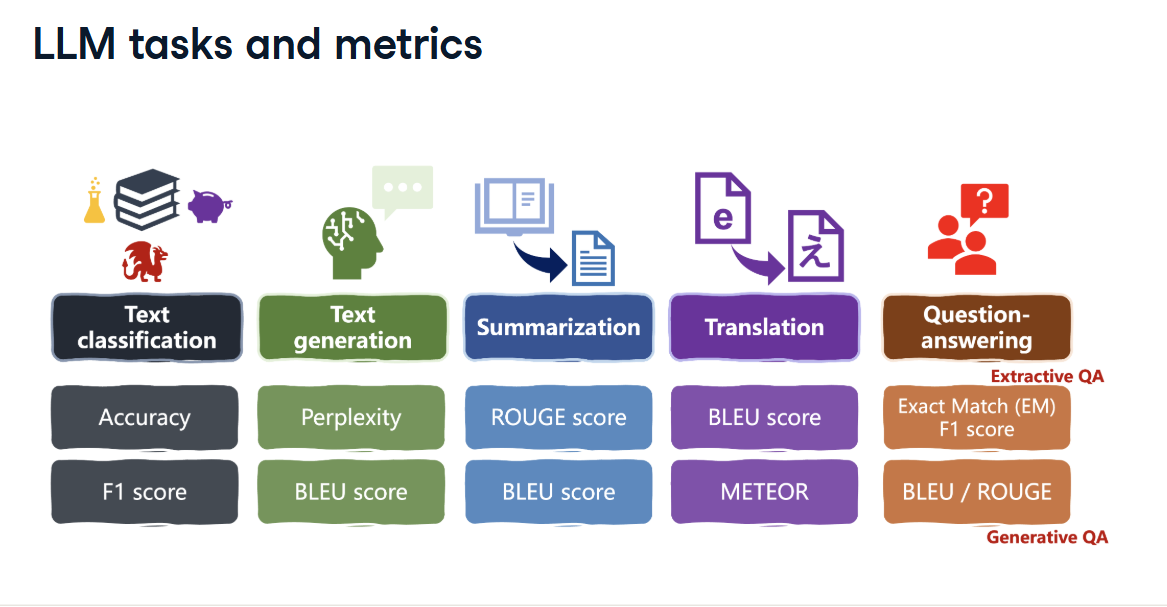

[Understanding BLEU, ROUGE, and METEOR: Easy Metrics for Evaluating AI-Generated Tex](https://www.linkedin.com/pulse/understanding-bleu-rouge-meteor-easy-metrics-text-aditya-agarwal-sddsc/)

## The ROUGE metric

It is a set of metrics used to evaluate the quality of text summarization and machine translation systems. It works by comparing an automatically generated summary or translation against a reference or set of references, typically human-produced. ROUGE measures the similarity between the generated text and the reference text based on n-gram overlap, with higher scores indicating greater similarity.

In [ ]:
from evaluate import load
!pip install rouge_score
rouge = evaluate.load("rouge")

predictions = ["""Pluto is a dwarf planet in our solar system, located in the Kuiper Belt beyond Neptune, and was formerly considered the ninth planet until its reclassification in 2006."""]
references = ["""Pluto is a dwarf planet in the solar system, located in the Kuiper Belt beyond Neptune, and was previously deemed as a planet until it was reclassified in 2006."""]

# Calculate the rouge scores between the predicted and reference summaries
results = rouge.compute(predictions=predictions, references=references)
print("ROUGE results: ", results)
predictions = ["""Pluto is a dwarf planet in our solar system, located in the Kuiper Belt beyond Neptune, and was formerly considered the ninth planet until its reclassification in 2006."""]
references = ["""Pluto is a dwarf planet in the solar system, located in the Kuiper Belt beyond Neptune, and was previously deemed as a planet until it was reclassified in 2006."""]

# Calculate the rouge scores between the predicted and reference summaries
results = rouge.compute(predictions=predictions, references=references)
print("ROUGE results: ", results)

## Evaluating with METEOR
[METEOR](https://huggingface.co/spaces/evaluate-metric/meteor) excels at evaluating some of the more semantic features in text. It works similar to ROUGE by comparing a model-generated output to a reference output.

In [13]:
from evaluate import load
!pip install meteor
meteor = evaluate.load('meteor')
predictions = ["It is a guide to action which ensures that the military always obeys the commands of the party"]
references = ["It is a guide to action that ensures that the military will forever heed Party commands"]
results = meteor.compute(predictions=predictions, references=references)
print("Meteor: ", meteor)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Meteor:  EvaluationModule(name: "meteor", module_type: "metric", features: [{'predictions': Value(dtype='string', id='sequence'), 'references': Sequence(feature=Value(dtype='string', id='sequence'), length=-1, id='references')}, {'predictions': Value(dtype='string', id='sequence'), 'references': Value(dtype='string', id='sequence')}], usage: """
Computes METEOR score of translated segments against one or more references.
Args:
    predictions: list of predictions to score. Each prediction
        should be a string with tokens separated by spaces.
    references: list of reference for each prediction. Each
        reference should be a string with tokens separated by spaces.
    alpha: Parameter for controlling relative weights of precision and recall. default: 0.9
    beta: Parameter for controlling shape of penalty as a function of fragmentation. default: 3
    gamma: Relative weight assigned to fragmentation penalty. default: 0.5
Returns:
    'meteor': meteor score.
Examples:

    >

# Evaluating with Exact Match (EM)

Exact Match helps us evaluate models when it comes to extractive question and answering but looking for, you guessed it, exact matches!

In [12]:
!pip install exact_match
from evaluate import load

# Load the metric
exact_match = evaluate.load('exact_match')

predictions = ["It's a wonderful day", "I love dogs", "DataCamp has great AI courses", "Sunshine and flowers"]
references = ["What a wonderful day", "I love cats", "DataCamp has great AI courses", "Sunsets and flowers"]

# Compute the exact match and print the results
results = exact_match.compute(predictions=predictions, references=references)
print("EM results: ", results)



ERROR: Could not find a version that satisfies the requirement exact_match (from versions: none)
ERROR: No matching distribution found for exact_match


EM results:  {'exact_match': 0.25}


## Toxicity in LLMs

Checking for toxicity in Large Language Models (LLMs) involves evaluating the generated text for offensive or harmful content. This can be done through various techniques, including using toxicity classifiers, rule-based filtering, real-time detection, and even human-in-the-loop monitoring. The goal is to ensure that LLMs produce safe and ethical outputs


In [10]:
!pip install datasets transformers evaluate -q
from datasets import load_dataset
import evaluate
from transformers import AutoModelForSequenceClassification

toxicity = evaluate.load("toxicity", 'DaNLP/da-electra-hatespeech-detection', module_type="measurement")

user_1 = ["This is a test sentence.", "Another sentence for user 1."]
user_2 = ["This is a different test sentence.", "Sentence for user 2."]

# Load the toxic classifier to inspect its labels
toxic_classifier = AutoModelForSequenceClassification.from_pretrained('DaNLP/da-electra-hatespeech-detection')

# Get the supported labels from the model's config
model_labels = toxic_classifier.config.id2label
print("Model labels:", model_labels)

# Based on the output of model_labels, choose the appropriate toxic_label.
# Assuming 'toxic' is one of the keys, we'll use that.
# Replace 'toxic' with the actual key if it's different in your model's labels.
# Let's assume the key is 'toxic' based on the metric name, but you should verify from the print output.
# If the key is an integer, you might need to find the corresponding string value.
toxic_label_key = None
for key, value in model_labels.items():
    if value.lower() == 'toxic': # Or check for other relevant terms like 'offensive' or 'abusive'
        toxic_label_key = value
        break
    # If 'toxic' is not found, try to find the label related to the DaNLP model's specific task,
    # which is "hatespeech detection". We'll look for 'offensive', 'hate', or similar.
    if 'offensive' in value.lower():
         toxic_label_key = value
         break
    if 'hate' in value.lower():
        toxic_label_key = value
        break

# If after checking, no suitable label is found, you might need to investigate the model's documentation
# or the metric's documentation further. For now, we'll assume 'offensive' or similar is present.
# As a fallback, let's check if there's a label at index 1, as toxic labels are often indexed after the non-toxic ones.
if toxic_label_key is None and 1 in model_labels:
    toxic_label_key = model_labels[1]
    print(f"Warning: Could not find 'toxic', 'offensive', or 'hate' in labels. Using label at index 1: {toxic_label_key}")
elif toxic_label_key is None:
     raise ValueError("Could not determine the correct toxic_label from the model's configuration.")


# Calculate the individual toxicities using the determined toxic_label
toxicity_1 = toxicity.compute(predictions=user_1, toxic_label=toxic_label_key)
toxicity_2 = toxicity.compute(predictions=user_2, toxic_label=toxic_label_key)
print("Toxicities (user_1):", toxicity_1['toxicity'])
print("Toxicities (user_2): ", toxicity_2['toxicity'])

# Calculate the maximum toxicities using the determined toxic_label
toxicity_1_max = toxicity.compute(predictions=user_1, aggregation="maximum", toxic_label=toxic_label_key)
toxicity_2_max = toxicity.compute(predictions=user_2, aggregation="maximum", toxic_label=toxic_label_key)
print("Maximum toxicity (user_1):", toxicity_1_max['max_toxicity'])
print("Maximum toxicity (user_2): ", toxicity_2_max['max_toxicity'])

# Calculate the toxicity ratios using the determined toxic_label
toxicity_1_ratio = toxicity.compute(predictions=user_1, aggregation="ratio", toxic_label=toxic_label_key)
toxicity_2_ratio = toxicity.compute(predictions=user_2, aggregation="ratio", toxic_label=toxic_label_key)
print("Toxicity ratio (user_1):", toxicity_1_ratio['toxicity_ratio'])
print("Toxicity ratio (user_2): ", toxicity_2_ratio['toxicity_ratio'])

config.json:   0%|          | 0.00/885 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/55.0M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/388 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/239k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


Model labels: {0: 'not offensive', 1: 'offensive'}
Toxicities (user_1): [0.9992814660072327, 0.9954706430435181]
Toxicities (user_2):  [0.998897910118103, 0.9968910813331604]
Maximum toxicity (user_1): 0.9992814660072327
Maximum toxicity (user_2):  0.998897910118103
Toxicity ratio (user_1): 1.0
Toxicity ratio (user_2):  1.0
